In [1]:
import numpy as np
from numpy import matlib
import scipy.stats as stats
import matplotlib.pyplot as plt

#plt.xkcd() # omg...

Estimated a = 6.38684345986e-05, loc = 21.0833235746, scale = 10.3180563022


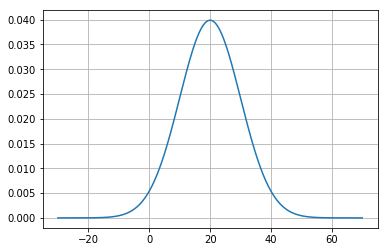

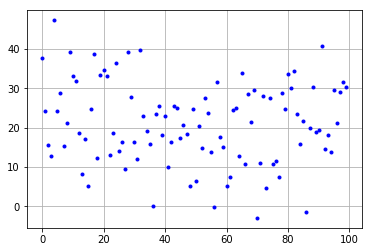

In [2]:
# create a gaussian plot
a = 0 # skew, when skew = 0, distribution is a normal distribution
loc = 20 # shift (mean)
scale = 10 # scale  (std dev)

# generate the distribution
rand_var = stats.skewnorm(a, loc, scale)
x = np.linspace(-30, 70, 1000)
y = rand_var.pdf(x)

# plot the pdf
plt.figure()
plt.plot(x, y)
plt.grid()

# sample a few points
n_points = 100
y_samp = rand_var.rvs(n_points)

# plot the drawn samples
plt.figure()
plt.plot(range(n_points), y_samp, 'b.')
plt.grid()

# estimate parameters from samples
a_est, loc_est, scale_est = stats.skewnorm.fit(y_samp)

print('Estimated a = {}, loc = {}, scale = {}'.format(a_est, loc_est, scale_est))

## Probability from a pdf
Ideally, one would integrated over the probability density function in the range of the event one wants the probability. By using the Cumulative Distribution Function (CDF), which is the integral of the pdf from negative infinity to the value at which it is calculated, an integral over a range can be solved by subtracting the CDF values at the two end points of the range.

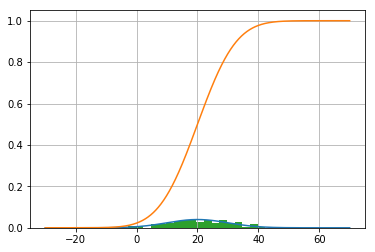

In [3]:
# plot the CDF and the PDF
rand_PDF = rand_var.pdf(x)
rand_CDF = rand_var.cdf(x)

plt.figure()
plt.plot(x, rand_PDF, label='pdf')
plt.plot(x, rand_CDF, label='cdf')
plt.hist(y_samp, 20, density=True) # 'normed' has been deprecated in favor of 'density'
plt.grid()

In [4]:
# get the probability of obtaining a value that falls between 0 and 5
# recall that the probabilty of a discrete value from a continous pdf is zero
prob_0_5 = rand_var.cdf(20) - rand_var.cdf(0)
print('Probability of value between 0 and 5 = {0:.2f}%'.format(prob_0_5))

Probability of value between 0 and 5 = 0.48%


## Expected Value
Let $X$ be a random variable with a finite number of finite outcomes $ x_1, x_2, ..., x_k $ occuring with probabilities $ p_1, p_2, ..., p_k $, respectively. The **expectation** of $X$ is defined as 
$$ E[X] = \sum_{i=1}^k x_ip_i = x_1p_1 + x_2p_2 + ... + x_kp_k $$
Since all probabilities $p_i$ add up to 1 $(p_1 + p_2 + ... + p_k = 1)$, the expected value is the weighted average, with $p_i$'s being the weights.

If all outcomes $x_i$ are equiprobable $(p_1 = p_2 = ... = p_k) $, then the weighted average turns into the simple average. This is intuitive: the expected value of a random variable is the average of all values it can take; thus the expected value is what one expects to happen *on average*. If the outcomes $x_i$ are not equiprobable, then the simple average must be replaced with the weighted average, which takes into account the fact that some outcomes are more likely than the others. The intuition however remains the same: the expected value of $X$ is what one expects to happen *on average*.

In [5]:
# Get probabilities between each whole number/bins
p_i = []
Ev = []
for i in range(-30, 70): # loop through each x
    p = rand_var.cdf(i+1) - rand_var.cdf(i) # compute the probability for a defined range
    p_i.append(p)  
    Ev.append(p*i)                          # compute an element of the expected value

'''
# print probabilities for each value
for i in p_i:
    print(i)
'''

# compute the expected value summation of each element
EVal = np.sum(Ev)

# print the total probability (ideally equals 1)
print('Total Probability = {}'.format(np.sum(p_i)))

# print the expected value
print('Expected Value = {}'.format(EVal))

Total Probability = 0.999999426697
Expected Value = 19.4999888206


The expected value is 199.799888403


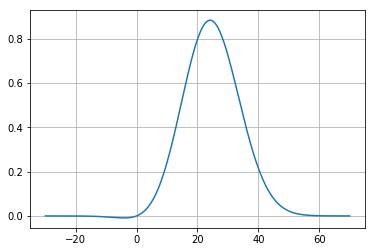

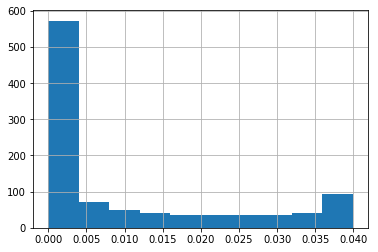

In [6]:
# Compute the expected value
# the expected value is the weighted averages

# compute the weighted values for each element
EV_y = x*y

# plot the weighted values for each
plt.figure()
plt.plot(x, EV_y)
plt.grid()

# compute the expected value
EV_y = np.sum(EV_y)

print('The expected value is {}'.format(EV_y))

plt.figure()
plt.hist(y)
plt.grid()

Estimated a = 2.62913857451, loc = 0.833623430799, scale = 2.77153354187


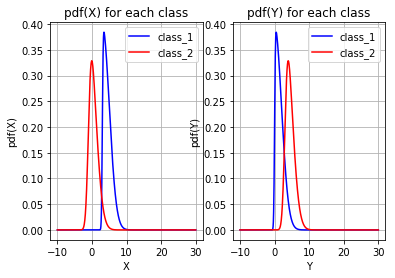

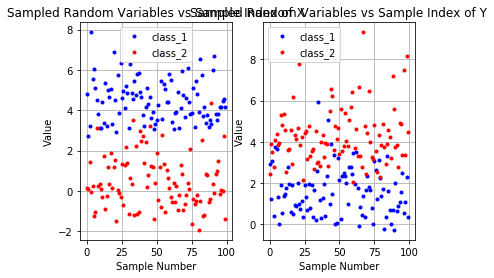

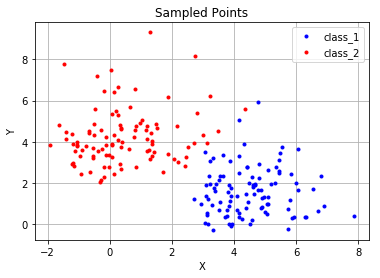

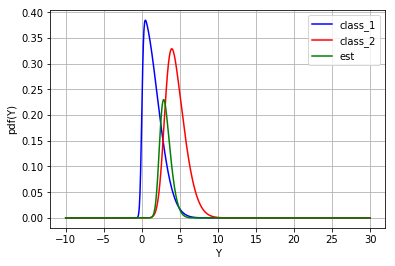

In [7]:
# create a gaussian plot
a_1 = 10 # skew, when skew = 0, distribution is a normal distribution
loc_1 = 0 # shift (mean)
scale_1 = 2 # scale  (std dev)

a_2 = 3 # skew, when skew = 0, distribution is a normal distribution
loc_2 = 3 # shift (mean)
scale_2 = 2 # scale  (std dev)

# generate the distribution
class_1x = stats.skewnorm(a_1, loc_1+3, scale_1)
class_2x = stats.skewnorm(a_2, loc_2-4, scale_2)

class_1y = stats.skewnorm(a_1, loc_1, scale_1)
class_2y = stats.skewnorm(a_2, loc_2, scale_2)

x_span = np.linspace(-10, 30, 1000)
x1 = class_1x.pdf(x_span)
x2 = class_2x.pdf(x_span)

y_span = np.linspace(-10, 30, 1000)
y1 = class_1y.pdf(y_span)
y2 = class_2y.pdf(y_span)

# plot the pdf for the y feature
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(x_span, x1, 'b')
plt.plot(x_span, x2, 'r')
plt.xlabel('X')
plt.ylabel('pdf(X)')
plt.title('pdf(X) for each class')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(y_span, y1, 'b')
plt.plot(y_span, y2, 'r')
plt.xlabel('Y')
plt.ylabel('pdf(Y)')
plt.title('pdf(Y) for each class')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

# sample a few points
n_points = 100
x1_samp = class_1x.rvs(n_points)
x2_samp = class_2x.rvs(n_points)

y1_samp = class_1y.rvs(n_points)
y2_samp = class_2y.rvs(n_points)

# plot the drawn samples
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(range(n_points), x1_samp, 'b.')
plt.plot(range(n_points), x2_samp, 'r.')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.title('Sampled Random Variables vs Sample Index of X')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

plt.subplot(1, 2, 2)
plt.plot(range(n_points), y1_samp, 'b.')
plt.plot(range(n_points), y2_samp, 'r.')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.title('Sampled Random Variables vs Sample Index of Y')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

# plot sample points
plt.figure()
plt.plot(x1_samp, y1_samp, 'b.')
plt.plot(x2_samp, y2_samp, 'r.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Points')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

# estimate parameters from samples
a_est, loc_est, scale_est = stats.skewnorm.fit([y1_samp, y2_samp])

plt.figure()
plt.plot(y_span, y1, 'b')
plt.plot(y_span, y2, 'r')
plt.plot(y_span, stats.skewnorm.pdf(x, a_est, loc_est, scale_est), 'g')
plt.xlabel('Y')
plt.ylabel('pdf(Y)')
plt.grid()
plt.legend(['class_1', 'class_2', 'est'], loc='best')
print('Estimated a = {}, loc = {}, scale = {}'.format(a_est, loc_est, scale_est))

In [8]:
# compute prior
num_class_c1 = np.size(x1_samp)
num_class_c2 = np.size(x2_samp)

c1_prior = 1.0 * num_class_c1 / (num_class_c1 + num_class_c2)
c2_prior = 1.0 * num_class_c2 / (num_class_c1 + num_class_c2)

# get sample mean and cov
c1_samp = np.array([x1_samp, y1_samp])
c2_samp = np.array([x2_samp, y2_samp])

c1_samp_mean = np.mean(c1_samp, axis=1)
c2_samp_mean = np.mean(c2_samp, axis=1)

c1_samp_cov = np.cov(c1_samp)
c2_samp_cov = np.cov(c2_samp)

c1_samp_cov_inv = np.linalg.inv(c1_samp_cov)
c2_samp_cov_inv = np.linalg.inv(c2_samp_cov)

c1_samp_cov_det = np.linalg.det(c1_samp_cov)
c2_samp_cov_det = np.linalg.det(c2_samp_cov)

c_min = np.min(np.concatenate((c1_samp, c2_samp), axis=1), axis=1)
c_max = np.max(np.concatenate((c1_samp, c2_samp), axis=1), axis=1)

#rint('c1_samp = {}'.format(c1_samp))
#print('c2_samp = {}'.format(c2_samp))
print('num_class_c1 = {}'.format(num_class_c1))
print('num_class_c2 = {}'.format(num_class_c2))

print('c1_prior = {}'.format(c1_prior))
print('c2_prior = {}'.format(c2_prior))

print('c_min = {}'.format(c_min))
print('c_max = {}'.format(c_max))

print('c1_samp_mean = {}'.format(c1_samp_mean))
print('c2_samp_mean = {}'.format(c2_samp_mean))
print('c1_samp_cov = {}'.format(c1_samp_cov))
print('c2_samp_cov = {}'.format(c2_samp_cov))
print('c1_samp_cov_inv = {}'.format(c1_samp_cov_inv))
print('c2_samp_cov_inv = {}'.format(c2_samp_cov_inv))
print('c1_samp_cov_det = {}'.format(c1_samp_cov_det))
print('c2_samp_cov_det = {}'.format(c2_samp_cov_det))

num_class_c1 = 100
num_class_c2 = 100
c1_prior = 0.5
c2_prior = 0.5
c_min = [-1.93047881 -0.27469804]
c_max = [7.86994436 9.31561308]
c1_samp_mean = [4.50575436 1.59848648]
c2_samp_mean = [0.45420473 4.24454496]
c1_samp_cov = [[1.12001601 0.01743591]
 [0.01743591 1.38213382]]
c2_samp_cov = [[1.6921671  0.28285921]
 [0.28285921 1.79301683]]
c1_samp_cov_inv = [[ 0.89301976 -0.01126563]
 [-0.01126563  0.72366106]]
c2_samp_cov_inv = [[ 0.60696393 -0.09575222]
 [-0.09575222  0.57282474]]
c1_samp_cov_det = 1.54770798933
c2_samp_cov_det = 2.95407475186


In [9]:
num_points = 100
[X1, X2] = np.meshgrid(np.linspace(c_min[0], c_max[0], num_points), np.linspace(c_min[1], c_max[1], num_points))

X = np.array((X1.flatten(), X2.flatten())).T
#print(X1)
#print(X2)
#print(X)
#X1.shape
#print(X1.flatten())
#print(X2.flatten())
print(X)
print(X1)

[[-1.93047881 -0.27469804]
 [-1.83148463 -0.27469804]
 [-1.73249046 -0.27469804]
 ...
 [ 7.67195602  9.31561308]
 [ 7.77095019  9.31561308]
 [ 7.86994436  9.31561308]]
[[-1.93047881 -1.83148463 -1.73249046 ...  7.67195602  7.77095019
   7.86994436]
 [-1.93047881 -1.83148463 -1.73249046 ...  7.67195602  7.77095019
   7.86994436]
 [-1.93047881 -1.83148463 -1.73249046 ...  7.67195602  7.77095019
   7.86994436]
 ...
 [-1.93047881 -1.83148463 -1.73249046 ...  7.67195602  7.77095019
   7.86994436]
 [-1.93047881 -1.83148463 -1.73249046 ...  7.67195602  7.77095019
   7.86994436]
 [-1.93047881 -1.83148463 -1.73249046 ...  7.67195602  7.77095019
   7.86994436]]


In [10]:
# compute the discriminant function
_X1 = X - np.matlib.repmat(c1_samp_mean, num_points*num_points, 1)
_X2 = X - np.matlib.repmat(c2_samp_mean, num_points*num_points, 1)
_M1 = np.sum(np.multiply( np.matmul(_X1, c1_samp_cov_inv), _X1), axis=1 )
_M2 = np.sum(np.multiply( np.matmul(_X2, c2_samp_cov_inv), _X2), axis=1 )

# if prior is zero, set to really small number instead to avoid dividing by zero
c1_prior = (1e-6 if c1_prior == 0 else c1_prior)

det_ratio = np.log(1.0 * c1_samp_cov_det / c1_samp_cov_det)
prior_term = 2 * np.log(1.0 * c2_prior / c1_prior)

discriminant = _M1 - _M2 + prior_term + det_ratio

print(_X1)
print(_X2)
print(_M1)
print(_M2)
print('det_ratio: {}'.format(det_ratio))
print('prior_term: {}'.format(prior_term))
print('discriminant: {}'.format(discriminant))
_M1.shape

[[-6.43623317 -1.87318452]
 [-6.33723899 -1.87318452]
 [-6.23824482 -1.87318452]
 ...
 [ 3.16620166  7.71712661]
 [ 3.26519583  7.71712661]
 [ 3.36419001  7.71712661]]
[[-2.38468354 -4.519243  ]
 [-2.28568936 -4.519243  ]
 [-2.18669519 -4.519243  ]
 ...
 [ 7.21775129  5.07106812]
 [ 7.31674546  5.07106812]
 [ 7.41573964  5.07106812]]
[39.26098456 38.13593975 37.02839785 ... 51.49878752 52.05013443
 52.61898425]
[13.08691363 12.89196511 12.70891291 ... 39.34157067 40.11875247
 40.90783058]
det_ratio: 0.0
prior_term: 0.0
discriminant: [26.17407093 25.24397463 24.31948495 ... 12.15721685 11.93138196
 11.71115366]


(10000,)

(array([  31,   32,   33, ..., 7998, 7999, 8099]),)
(10000,)
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 2)
(10000, 2)


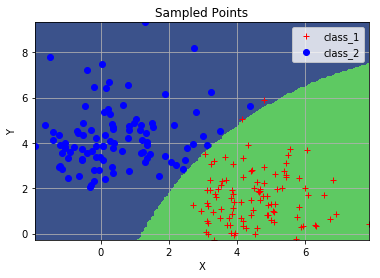

In [11]:
I = np.where(discriminant <= 0)
print(I)


print(discriminant.shape)
out = np.zeros((num_points, num_points))

I = np.unravel_index(I, (out.shape))

#out [discriminant <= 0] = 1
out[I] = 1
print(out)

print(_X1.shape)
print(_X2.shape)


# plot sample points
plt.figure()
plt.plot(x1_samp, y1_samp, 'r+')
plt.plot(x2_samp, y2_samp, 'bo')
plt.contourf(X1, X2, out, 1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Sampled Points')
plt.grid()
plt.legend(['class_1', 'class_2'], loc='best')

In [12]:
I = np.where(discriminant <= 0)
print(I)


print(discriminant.shape)
out = np.zeros((num_points, num_points))

I = np.unravel_index(I, (out.shape))

#out [discriminant <= 0] = 1
out[I] = 1
print(out)
print(out.shape)

(array([  31,   32,   33, ..., 7998, 7999, 8099]),)
(10000,)
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(100, 100)
